In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from gurobipy import Model, GRB, quicksum

In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)
constraint_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Seating Constraints.csv', index_col=0)

In [3]:
relationship_mtx

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Liz Rhea,Ian Rhea,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley
Richard Pattison,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0
Kathryn Russell,3.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0
Tim Balzer,3.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0
Mac Pattison,3.0,0.0,0.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
Ali Pattison,3.0,0.0,0.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jenny Falberg,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,0.0
Pat Jr. Pattison,3.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0
Morgan Pattison,2.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0
MC Davault,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
constraint_mtx.fillna(0, inplace=True)

In [5]:
all(constraint_mtx.columns == relationship_mtx.columns) and all(constraint_mtx.index == relationship_mtx.index) and all(constraint_mtx.index == constraint_mtx.columns)

True

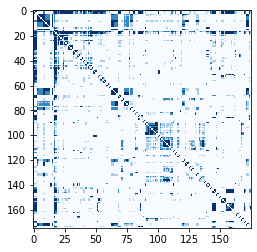

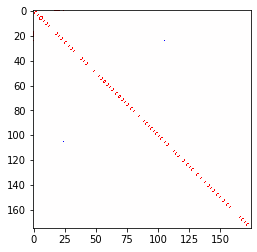

In [6]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.values, cmap='bwr', interpolation='nearest')
plt.show()

In [7]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[:50]

Mary Balzer            360.0
Richard Pattison       288.0
Max Balzer             229.0
Kathryn Russell        223.0
Tim Balzer             211.0
Holly Pattison         135.0
Wally Pattison         129.0
Genevieve Geoghan      103.0
Mac Pattison            96.0
Mary Grace Pattison     86.0
Maggie Dunn             81.0
Pat Jr. Pattison        78.0
Pat Pattison            75.0
Marie Pattison          75.0
Oscar Nordness          71.0
Ali Pattison            68.0
Molly Bammerlin         68.0
James Rogers            67.0
Suzie Campen            67.0
Tim Campen              67.0
Judy Bell               66.0
Morgan Pattison         66.0
Christie Ranges         65.0
Daryl Bammerlin         64.0
Mary Pattison           62.0
Cody Vild               62.0
Bonnie Neel             62.0
Olivia Bammerlin        62.0
Ella Pattison           62.0
Harper Bammerlin        62.0
Murd Neel               62.0
William Pattison        62.0
Sloane Fowkes           60.0
Angelo Morales          59.0
Mark Hepburn  

In [8]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[-50:]

Toni Hepburn            26.0
John Gretta             25.0
Erik Ahlgren            25.0
Kaitlin Olson           25.0
Mary Beth Gretta        25.0
Sam Waring              24.0
Maggie McGinley         24.0
Claire Meunier          24.0
Johan Ahlgren           24.0
Anneli Ahlgren          24.0
Hamideh Soltanzadeh     23.0
Molly Hamrick           23.0
Charlie Coolidge        22.0
Sam Nicholson           22.0
Daniel Cohen            21.0
Jenny Falberg           21.0
Liz Rhea                21.0
Paul Davault            21.0
Jukka Aromaa            21.0
Cara Touretzky          21.0
Ryan Hurley             20.0
Tori Iannuzzi           20.0
Bob Olson               20.0
John Mazza              19.0
Kendra Ruth             19.0
Astrid Wettstein        17.0
Aaron Hoogstraten       17.0
Maan Sangid             17.0
Megan Kesselman         17.0
Mallory Chandler        16.0
Caroline Coolidge       15.0
Leila Thomas            14.0
Jake Sartino            14.0
Haley Vertelney         14.0
Savannah River

In [9]:
guest_list = relationship_mtx.index.values.tolist()

In [10]:
len(guest_list)

175

In [11]:
for g in guest_list:
    for gp in guest_list:
        if gp == g:
            continue

        if relationship_mtx.loc[g, gp] != relationship_mtx.loc[gp, g]:
            print(g)
            print(gp)

        if constraint_mtx.loc[g, gp] != constraint_mtx.loc[gp, g]:
            print(g)
            print(gp)

In [12]:
graph = nx.Graph(name="Wedding Guest Network")
graph.add_nodes_from(guest_list)

In [13]:
edges = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:
        w = relationship_mtx.loc[g, gp]
        if w != 0:
            edges.append((g, gp, w))

In [14]:
len(edges)

2093

In [15]:
graph.add_weighted_edges_from(edges, weight='relationship_strength')

In [16]:
between_centrality = nx.betweenness_centrality(graph, weight='relationship_strength')
clusters = nx.clustering(graph, weight='relationship_strength')
centrality = nx.eigenvector_centrality(graph, weight='relationship_strength')

In [17]:
df_analysis = pd.concat((pd.Series(between_centrality).sort_index(), pd.Series(clusters).sort_index(), pd.Series(centrality).sort_index()), axis=1, keys=['between_centrality', 'clusters', 'centrality'])
df_analysis

,between_centrality,clusters,centrality
Aaron Hoogstraten,0.002611,0.439507,0.029801
Abby Nicholson,0.006339,0.379844,0.054349
Addie Neel,0.002039,0.537410,0.088765
Akshay Sriprasad,0.019979,0.288931,0.044351
Alexis Branagan,0.022258,0.326361,0.034861
...,...,...,...
Trish Davis,0.000000,0.842745,0.079997
Troy Nguyen,0.000556,0.532772,0.057128
Wally Pattison,0.037544,0.236292,0.154986
Wendy Bell,0.000019,0.805842,0.074333


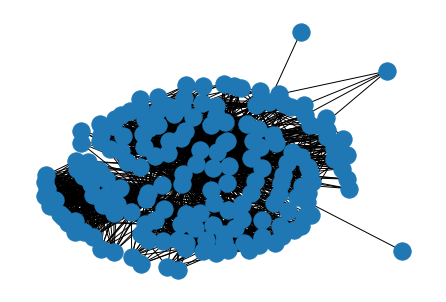

In [18]:
nx.draw(graph, nx.kamada_kawai_layout(graph))#, with_labels=True, node_size=300, node_color='blue', edge_color='black', width=1, font_size=15)

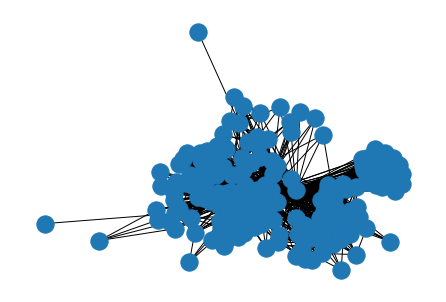

In [19]:
nx.draw(graph, nx.spring_layout(graph))

In [54]:
guest_list = guest_list[:40]

In [55]:
tables = {
    f'Table {t+1}': 10 for t in range(len(guest_list)//10 + 1)
}

In [56]:
seating_model = Model()

In [57]:
y = seating_model.addVars(guest_list, tables.keys(), vtype=GRB.BINARY, name="y")

In [58]:
not_seated_together_list = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:

        if constraint_mtx.loc[g, gp] == 1:
            relationship_mtx.loc[g, gp] *= 100
        elif constraint_mtx.loc[g, gp] == -1:
            not_seated_together_list.append((g, gp))

In [59]:
not_seated_together_list

[]

In [60]:
seating_model.setObjective(
    quicksum(
        quicksum(
            quicksum(
                relationship_mtx.loc[g, gp] * y[(g, table)] * y[(gp, table)] \
                    for table in tables.keys()) \
                for gp in guest_list[i+1:]) \
            for i, g in tqdm(enumerate(guest_list), total=len(guest_list))
    )
)

100%|██████████| 40/40 [00:00<00:00, 191.23it/s]


In [61]:
seating_model.addConstrs(quicksum(y[(g, table)] for g in guest_list) <= max_seats for table, max_seats in tables.items())

{('Table 1', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 2', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 3', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 4', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 5', 10): <gurobi.Constr *Awaiting Model Update*>}

In [62]:
seating_model.addConstrs(y[g, table] + y[gp, table] <= 1 for table in tables.keys() for g, gp in not_seated_together_list)

{}

In [63]:
seating_model.addConstrs(quicksum(y[g, table] for table in tables.keys()) == 1 for g in guest_list)

{'Richard Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Kathryn Russell': <gurobi.Constr *Awaiting Model Update*>,
 'Tim Balzer': <gurobi.Constr *Awaiting Model Update*>,
 'Mac Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Ali Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Ella Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Mary Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'William Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Wally Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Holly Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Daryl Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Molly Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Olivia Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Harper Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Austin Giangeruso': <gurobi.Constr *Awaiting Model Update*>,
 'Mary Grace Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Troy Nguyen': <gurobi.Constr 

In [64]:
seating_model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 45 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x4105cfd6
Model has 1490 quadratic objective terms
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 6e+08]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 9.000001e+08
Presolve time: 0.00s
Presolved: 1535 rows, 1690 columns, 4870 nonzeros
Variable types: 0 continuous, 1690 integer (1690 binary)

Root relaxation: objective 0.000000e+00, 179 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf 